## Цель - Исследловать количество продаж по СБП, чтобы понять сколько заказов идет через этот терминал, и их увеличить

In [82]:
#import jovian

In [ ]:
#Сначала импортируем нужные модули.

import pandas as pd
import glob
#import dask.dataframe as dd


In [20]:
#  pip install pandas
from pathlib import Path

data_dir = Path("/home/nal/apteka-automate/attachments/")

df = pd.concat([pd.read_csv(file,sep=';') for file in data_dir.glob("*.csv")], ignore_index=True)

Смотрю данные

* Удалим пустые сроки и колонку лишнюю, образовавшиеся после слияния файлов "Итого", содержащие NaN, сначала удалим колонку чтобы не удалтить весь датасет

In [21]:
df=df.drop(columns=['Unnamed: 12','RRN','Код авторизации'],axis=1)

In [22]:
df=df.dropna()

* Выкинем первые колонки и RRN,Код авторизации для большей анонимности данных

In [23]:
#df

In [24]:
df=df.iloc[:,2:10] #dont start twice!!!

In [25]:
df.to_csv("/home/nal/apteka-automate/attachments/all/result_new.csv", index=False)

In [26]:
df=pd.read_csv('/home/nal/apteka-automate/attachments/all/result_new.csv',sep=',')

1.Исследование данных

In [27]:
df.dtypes

Номер источника платежа     object
Наименование МПС            object
Тип операции                object
Дата операции               object
Время операции              object
Сумма операции             float64
S/N терминала               object
Комиссия                   float64
dtype: object

In [28]:
df

,Номер источника платежа,Наименование МПС,Тип операции,Дата операции,Время операции,Сумма операции,S/N терминала,Комиссия
0,220220******2321,МИР,Debit,04.02.2023,06:25:06,246.00,451-344-522,3.94
1,220220******6422,МИР,Debit,04.02.2023,07:09:41,178.47,451-344-522,2.86
2,220019******7991,МИР,Debit,04.02.2023,07:27:42,513.00,451-344-522,8.21
3,220077******0142,МИР,Debit,04.02.2023,07:48:28,271.46,451-344-522,4.34
4,220220******0476,МИР,Debit,04.02.2023,08:02:12,300.00,451-344-522,4.80
...,...,...,...,...,...,...,...,...
7620,220220******3778,МИР,Debit,16.01.2023,18:58:26,269.00,450-181-190,4.30
7621,427616******0254,VISA,Debit,16.01.2023,19:09:26,322.00,451-344-522,5.15
7622,553609******6842,MC,Debit,16.01.2023,19:16:48,452.00,450-181-190,7.23
7623,437772******3131,VISA,Debit,16.01.2023,19:31:58,578.00,450-181-190,9.25


In [29]:
df['Номер источника платежа'].value_counts()

553691******9871    30
553691******7586    20
427606******1060    15
220220******3362    15
427606******9135    15
                    ..
220220******1266     1
489347******2194     1
220220******0441     1
553691******9813     1
220070******1523     1
Name: Номер источника платежа, Length: 4447, dtype: int64

In [30]:
df['Наименование МПС'].value_counts()

МИР     4383
VISA    1896
MC      1296
СБП       50
Name: Наименование МПС, dtype: int64

In [31]:
df['Тип операции'].value_counts()

Debit    7625
Name: Тип операции, dtype: int64

пока одно значение, оставлю тк может измениться с новыми данными

In [32]:
df['S/N терминала'].value_counts()

451-344-522         3359
450-181-190         3113
2330511563          1122
2330516939            29
3f49ffbb5afca6b7       2
Name: S/N терминала, dtype: int64

* Преобразуем дату в удобный формат для работы

In [33]:
df['Дата']=df['Дата операции'].astype(str) + " " + df['Время операции'].astype(str).str.zfill(6)
df['Дата']

0       04.02.2023 06:25:06
1       04.02.2023 07:09:41
2       04.02.2023 07:27:42
3       04.02.2023 07:48:28
4       04.02.2023 08:02:12
               ...         
7620    16.01.2023 18:58:26
7621    16.01.2023 19:09:26
7622    16.01.2023 19:16:48
7623    16.01.2023 19:31:58
7624    16.01.2023 19:57:57
Name: Дата, Length: 7625, dtype: object

In [34]:
df['date'] = pd.to_datetime(df['Дата'], format='%d.%m.%Y %H:%M:%S')

* Теперь с датой все ок! Старые колонки не нудны и их удалю

In [35]:
df['date']

0      2023-02-04 06:25:06
1      2023-02-04 07:09:41
2      2023-02-04 07:27:42
3      2023-02-04 07:48:28
4      2023-02-04 08:02:12
               ...        
7620   2023-01-16 18:58:26
7621   2023-01-16 19:09:26
7622   2023-01-16 19:16:48
7623   2023-01-16 19:31:58
7624   2023-01-16 19:57:57
Name: date, Length: 7625, dtype: datetime64[ns]

In [37]:
df=df.drop(columns=['Дата операции','Время операции','Дата'],axis=1)

In [38]:
df_data_index=df.set_index('date')

In [39]:
df_data_index=df_data_index.groupby('date').sum()

Построим графики для исследования

In [40]:
import numpy as np

In [41]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

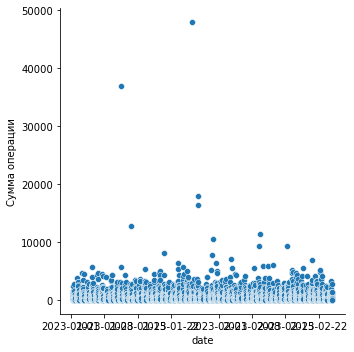

In [42]:
sns.relplot(data=df_data_index, x="date", y="Сумма операции", kind="scatter")

Исследую выбросы, которые нужно будет убрать из данных при построении моделей машинного обучения

In [43]:
df.query('`Сумма операции` > 20000')
#Всего 2 записи с суммой значительно выше среднего, можно удалить

,Номер источника платежа,Наименование МПС,Тип операции,Сумма операции,S/N терминала,Комиссия,date
2109,220220*********5271,МИР,Debit,36857.4,450-181-190,589.72,2023-01-11 13:02:27
5170,220220*********8024,МИР,Debit,48000.0,450-181-190,768.00,2023-01-26 10:23:33


* Посмотрим долю СБП в продажах

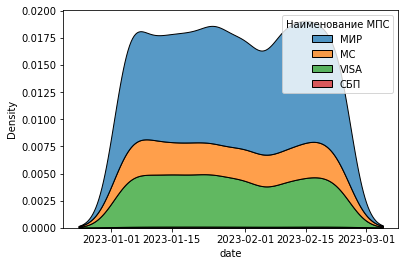

In [44]:
sns.kdeplot(data=df, x="date", hue="Наименование МПС", multiple="stack");
#СБП нужно нарастить

In [45]:
df_sum=df.groupby(pd.Grouper(key='date', axis=0,freq='D'))
df_sum=df_sum.sum()

In [46]:
df_sum.head()

,Сумма операции,Комиссия
date,,
2023-01-01,30568.03,489.08
2023-01-02,70883.35,1134.16
2023-01-03,91810.34,1446.85
2023-01-04,68154.88,1084.38
2023-01-05,122327.71,1948.09


In [47]:
df_count=df.groupby(pd.Grouper(key='date', axis=0,freq='D'))
df_count=df_count[['Сумма операции']].count()

In [48]:
df_sum_count=pd.merge(df_sum,df_count,on='date',how='inner')

In [49]:
#df_sum.groupby(pd.Grouper(key='date', axis=0,freq='M'))

In [50]:
df_sum_count.head()

,Сумма операции_x,Комиссия,Сумма операции_y
date,,,
2023-01-01,30568.03,489.08,68
2023-01-02,70883.35,1134.16,132
2023-01-03,91810.34,1446.85,153
2023-01-04,68154.88,1084.38,158
2023-01-05,122327.71,1948.09,186


#Посмотрим на суммы комиссии по месяцам

In [51]:
#df_month=df.groupby(pd.Grouper(key='date', axis=0,freq='M'))
#df_month=df_month.sum()

In [52]:
#df_month

Посчитаем процент комиссии с терминалов от продаж

In [53]:
df['procent_commision']=df['Комиссия']/(df['Сумма операции'])*100

* Посмотрим среднюю комиссию по всем платежам

In [54]:
df['procent_commision'].describe()

count    7625.000000
mean        1.591237
std         0.114656
min         0.000000
25%         1.599637
50%         1.600000
75%         1.600352
max         2.500000
Name: procent_commision, dtype: float64

In [55]:
df['procent_commision'].value_counts()

1.600000    2199
1.602941      45
1.597222      38
1.596154      35
1.598485      33
            ... 
1.599606       1
1.601349       1
1.599662       1
1.601311       1
1.587786       1
Name: procent_commision, Length: 2377, dtype: int64

Посмотрим Как часто люди платят по СБП. Комиссия СБП около 0.5 процента

<AxesSubplot:>

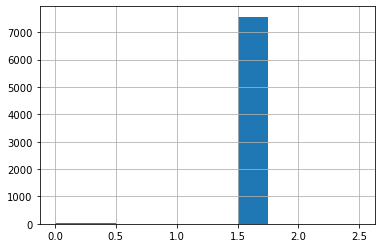

In [56]:
df['procent_commision'].hist()

* Посмотрим всего сколько было платежей с комиссией менее 1%

In [59]:
df_comm=(df['procent_commision']<1).sum()
df_comm.sum()

50

* посчитаем среднюю комиссию по СБП, исключим нулевые комисии

In [60]:
a=df.query('`procent_commision` < 1')

In [61]:
a.query('`procent_commision` > 0')['procent_commision'].mean()

0.39734333850885106

* Выяснить откуда берется нулевая комиссия..

In [62]:
df.query('`procent_commision` < 1').sort_values(by=['date']).head()

,Номер источника платежа,Наименование МПС,Тип операции,Сумма операции,S/N терминала,Комиссия,date,procent_commision
7324,7905*****48,СБП,Debit,558.0,2330516939,2.23,2023-01-03 07:26:05,0.399642
7334,7962*****89,СБП,Debit,1190.0,2330516939,4.76,2023-01-03 09:15:43,0.400000
7383,7962*****95,СБП,Debit,90.0,2330516939,0.36,2023-01-03 12:40:06,0.400000
1543,7962*****02,СБП,Debit,265.0,3f49ffbb5afca6b7,1.06,2023-01-04 13:32:44,0.400000
1600,7962*****29,СБП,Debit,125.0,2330516939,0.50,2023-01-04 17:27:43,0.400000


In [63]:
df.query('`procent_commision` == 0').sort_values(by=['date']).head()

,Номер источника платежа,Наименование МПС,Тип операции,Сумма операции,S/N терминала,Комиссия,date,procent_commision
2619,7905*****22,СБП,Debit,370.00,2330511563,0.0,2023-01-30 18:23:30,0.0
6938,7906*****63,СБП,Debit,36.00,2330516939,0.0,2023-01-31 11:23:55,0.0
2217,7967*****15,СБП,Debit,122.00,2330516939,0.0,2023-02-01 07:16:02,0.0
2319,7967*****81,СБП,Debit,3489.16,2330511563,0.0,2023-02-01 15:49:23,0.0
2673,7905*****62,СБП,Debit,800.00,2330511563,0.0,2023-02-06 10:33:48,0.0


In [64]:
(df['procent_commision'] == 0).sum()

24

Посмотрм долю платежей в СБП

In [66]:
df_comm.sum()/df.shape[0]*100

0.6557377049180327

* Всего 50 платежей по СБП, из них 24 с нулевой комиссией c 30-января-2023г,
  Из 7625 платежей за 2 месяца с начала года, что является 0.65% от всех платежей

Также посмотрим на продажи по деньгам и количеству

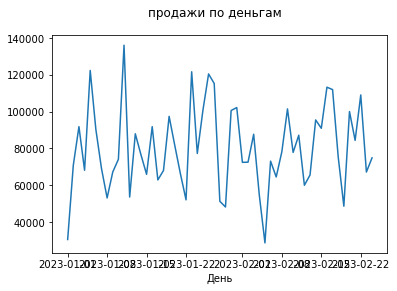

In [67]:
#plt.plot(df_dt['plan_amount'])
x=df_sum_count[('Сумма операции_x')]

fig, ax = plt.subplots()
ax.plot(x)

# titleax.plot(x) and labels, setting initial sizes
fig.suptitle('продажи по деньгам', fontsize=12)
ax.set_xlabel('День');

# setting label sizes after creation
#ax.xaxis.label.set_size(20)


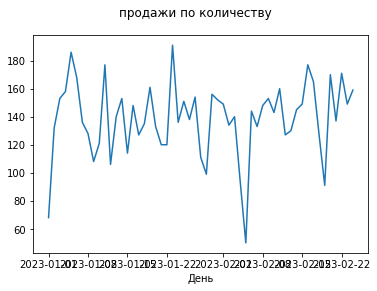

In [68]:
y=df_sum_count['Сумма операции_y']
ax.plot(y)
ax.set_ylabel('Сумма')   # relative to plt.rcParams['font.size']

fig, ax = plt.subplots()
fig.suptitle('продажи по количеству чеков', fontsize=12)
ax.set_xlabel('День');
ax.plot(y);

Проблемы и выводы
+ 1. Дата - проблема с чтением пандаса из csv необычном формате- не выдает ошибок!!!
- 2. Графики - как сделать нормальный размер? Почему есть провалы в продажах?

Рекомендации - Поднять долю плажей по СБП: сделать мотивацию для покупатей платить с помощью QR кода и камеры смартфона, тем самым уменьшив комиссию со средней - 1.59% до 0.4%, в 4 раза!

* Выводы - нулевая комиссии по СБП - маркетинговая акция для новых клиентов банка с 30 января, но старых клиентов почему-то не уведомили, поэтому возникла путаница с нулевой комиссиией в платежах за февраль.

In [ ]:
#todo - предсказать сумму продаж и кол-во чеков

In [70]:
pip install jovian

Note: you may need to restart the kernel to use updated packages.


<module 'jovian' from '/home/nal/anaconda3/lib/python3.9/site-packages/jovian/__init__.py'>